# Deep Learning for Image Classification Assessment

## The challenge:
**Your task is to build an image classifier with Keras and Convolutional Neural Network for the Fashion MNIST dataset.**

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

## Download dataset

In [1]:
from keras.datasets import fashion_mnist

In [2]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


## Visualizing the data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

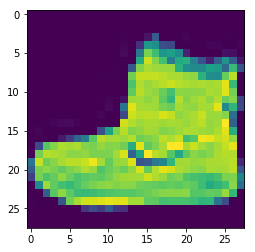

In [4]:
plt.imshow(x_train[0])

## Preprocessing the Data
**Normalize the X train and X test data by dividing by the max value of image arrays**

In [10]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

**Reshape the X arrays to include a 4 dimensions of the single channel**

In [20]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [21]:
from keras.utils.np_utils import to_categorical

In [22]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

## Building the Model
**Use Keras to create a model.**
- 2D Convolutional Layer, filters=32 & kernel_size=(4,4)
- Pooling Layer where pool_size = (2,2)
- Flatten Layer
- Dense Layer (128 Neurons) ReLu Activation
- Final Dense Layer of 10 Neurons with a softmax activation

**Then Compile the model with these parameters: loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy']**

In [25]:
from keras.models import Sequential

In [26]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [31]:
input_shape = (28,28,1)
model = Sequential()
# Convolutional 2D
model.add(Conv2D(filters=32,
                kernel_size=(4,4),
                input_shape=input_shape,
                activation='relu' 
                ))
# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())

# First Dense Layer
model.add(Dense(128,
               activation='relu'))

# Final Dense Layer
model.add(Dense(10,
               activation='softmax'))

#Compile
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])


In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


## Training the Model
**Train/Fit the model to the x_train set.**

In [33]:
model.fit(x_train,
         y_cat_train,
         epochs=5)

Epoch 1/5
60000/60000 [==============================] - 222s 4ms/step - loss: 0.4092 - acc: 0.8544
Epoch 2/5
60000/60000 [==============================] - 225s 4ms/step - loss: 0.2768 - acc: 0.9004
Epoch 3/5
60000/60000 [==============================] - 229s 4ms/step - loss: 0.2371 - acc: 0.9139
Epoch 4/5
60000/60000 [==============================] - 232s 4ms/step - loss: 0.2136 - acc: 0.9234
Epoch 5/5
60000/60000 [==============================] - 235s 4ms/step - loss: 0.1951 - acc: 0.9305


## Evaluation the Model
**Show the accuracy, precision,recall,f1-score the model archieved on the x_test data set.**

In [35]:
model.metrics_names

['loss', 'acc']

In [36]:
from sklearn.metrics import classification_report

In [37]:
predictions = model.predict_classes(x_test)

In [38]:
predictions

array([9, 2, 1, ..., 8, 1, 5])

In [39]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.89      0.84      0.87      1000
          1       0.97      0.99      0.98      1000
          2       0.88      0.79      0.83      1000
          3       0.92      0.90      0.91      1000
          4       0.91      0.72      0.80      1000
          5       0.97      0.98      0.98      1000
          6       0.61      0.86      0.71      1000
          7       0.95      0.98      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.95      0.97      1000

avg / total       0.91      0.90      0.90     10000

